## Project - Ensemble Techniques

Submitted by: Dr. Shrishail S. Gajbhar as part of the "Ensemble Techniques" module project evaluation.

## Dataset Information:
* **Name: bank-full.csv**
* **Domain: Banking**

## Aim: The classification goal is to predict if the client will subscribe a term deposit ('yes') or not ('no').


## Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using an Ensemble Model
* Tuning an Ensemble model

## About the dataset, column attributes (independent variables) and target variable (dependent variable)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Attribute Information**:
* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 
* default: has credit in default? (categorical: 'no','yes','unknown')
* balance: average yearly balance, in euros (numeric)
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
* contact: contact communication type (categorical: 'cellular','telephone')
* day: last contact day of the month (numeric 1 -31)
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* Target: has the client subscribed a term deposit? (binary: "yes","no")

**There are total 17 attributes in the dataset and in the context of the given problem, the target (or dependent) attribute is "Target" whereas the remaining are independent attributes.**

### 1) Importing Necessary Libraries

In [17]:
import pandas as pd # importing Pandas library for performing dataframe related operations
import numpy as np  # importing numpy for performing numeric array related operations
import matplotlib.pyplot as plt # importing matplotlib.pyplot for basic plotting operations
import seaborn as sns  # importing seaborn for advanced data visualization
# Below is the magic function to display and save graphs/figures in the output cells
%matplotlib inline   
from sklearn.model_selection import train_test_split # For train-test split
# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report, precision_score, recall_score
from sklearn.linear_model import LogisticRegression # For logistic Regression
from sklearn.naive_bayes import GaussianNB # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier # For K-NN Classifier
from sklearn.svm import SVC # For support vector machine based classifier
from sklearn.preprocessing import StandardScaler # For standardizing the data (0 mean, var=1)
# Importing the ensemble models to be compared
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
import xgboost # Widely used implmentation of a gradient boost algorithm 
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.tree import export_graphviz # For visualizing the Decision Tree Model
from os import system  #Needed for visualizing the Decision Tree Model
from IPython.display import Image # To display the image

### 2) Reading the dataset as dataframe

In [18]:
df_orig = pd.read_csv('bank-full.csv')
# Creating a copy of the original dataframe
df = df_orig.copy()

### Let us take a look at the raw dataset

In [19]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

**By observing the first five rows, one can see that many column attributes are categorical in nature**

### 3) Performing basic EDA

#### a) Let us see shape of the dataset

In [20]:
df.shape

(45211, 17)

**One can see that, there are 17 column attributes (including the target attribute) and 45211 customers information**

#### b) Let us print the data type of each attribute

In [21]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [22]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

**One can see that there are 10 categorical columns and 7 numeric columns**

In [23]:
# Let us take a look at the numeric columns
df_num = df.select_dtypes(include=['int64'])
df_num.head()

age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0

In [24]:
# Let us take a look at the ategorical columns
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome Target  
0  unknown     no  
1  unknown     no  
2  unknown     no  
3  unknown     no  
4  unknown     no

### c) Let us check the presence of missing values

In [25]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

**Fortunately, we do not have any missing values in the dataset** 

#### d) Let us see the 5 point summary of numerical attributes 

In [26]:
df_num.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

**Observations:**
* **Average age of the population is around 41 years, minimum age is 18 whereas maximum is 95, since standard deviation of the age is around 10, 95% of the population age lies in [20,...,60] range.**
* **Standard deviation is pretty high for the balance attribute which is almost twice of the mean  balance (3044 Euros). Also, 75% of the population has average yearly balance below 1428 Euros**
* Day: This is just the last contact day of the month on which customer was conctacted
* Duration: Average time for last contact duration is around 258 seconds (or 4.3 minutes). As mentioned in the description, this attribute is highly correlated with the target column and is of high importance for prediction of target attribute. 
* pdays: On an average number of days that passed by after the client was last contacted from a previous campaign are 40. This is a highly skewed attribute since median is -1 whereas mean is 40.
* 75% percent of the population was contacted 0 times before this campaign

#### Let us see the summary for categorical attributes


In [27]:
df_cat.describe()

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome Target  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

**Observations:**
* There are 12 job categories and 21% of the clients have "blue-collar job" 
* 60% of the clients belong to married category
* 50% of the clients have completed at least secondary education
* Most of the clients (98.2%) do not have credit in default
* 55% of the clients have opted for the housing loan
* 84% of the clients do not have any kind of personal loan with the bank
* 30% of the clients were last contacted in the month of May
* For 82% of the clients, outcome of their previous marketing campaign is unknown

### Let us see the distribution of each independent attribute with respect to the target attribute 

#### First of all, let us analyse the target attribute

In [28]:
# Converting above target class distribution as dataframe
df_target = df['Target'].value_counts()
df_target = pd.DataFrame({'Target':df_target.index, 'count':df_target.values})
df_target['Percentage'] = df_target['count']/df_target['count'].sum()*100
df_target

Target  count  Percentage
0     no  39922    88.30152
1    yes   5289    11.69848

**One can see that, 11.70% of the total clients opted for term deposit whereas 88.30% didn't.** 

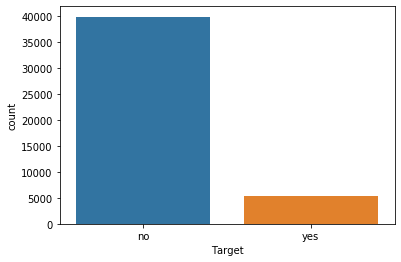

In [29]:
# barplot for target column distribution
sns.barplot(x=df_target['Target'],y = df_target['count']);

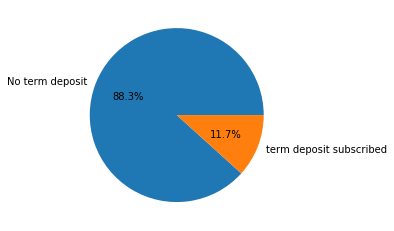

In [30]:
# Let us plot the Pie Plot
plt.pie(df_target['Percentage'],labels=['No term deposit','term deposit subscribed'],autopct= '%1.1f%%');

**One can see that the target attribute is highly imbalanced.**

### Let us analyze all the categorical variables except Target attribute

#### Analysing Job attribute

In [31]:
df['job'].value_counts(normalize=True).rename('job %').to_frame()*100

job %
blue-collar    21.525735
management     20.919688
technician     16.803433
admin.         11.437482
services        9.188029
retired         5.007631
self-employed   3.492513
entrepreneur    3.289023
unemployed      2.882042
housemaid       2.742695
student         2.074716
unknown         0.637013

**There are 12 job categories, "blue-collar" appearing the most whereas "management" and "technician" also appear frequently.**

In [32]:
# Let us see the term plan subscription among the job categories
df_job = df_cat.groupby(['job','Target']).size()
df_job=df_job.unstack()
# Let's us put also the percentage
df_job['no %'] = df_job.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_job['yes %'] = df_job.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_job = df_job.sort_values(by='yes %',ascending=False)
df_job

Target           no   yes       no %      yes %
job                                            
student         669   269  71.321962  28.678038
retired        1748   516  77.208481  22.791519
unemployed     1101   202  84.497314  15.502686
management     8157  1301  86.244449  13.755551
admin.         4540   631  87.797331  12.202669
self-employed  1392   187  88.157061  11.842939
unknown         254    34  88.194444  11.805556
technician     6757   840  88.943004  11.056996
services       3785   369  91.116996   8.883004
housemaid      1131   109  91.209677   8.790323
entrepreneur   1364   123  91.728312   8.271688
blue-collar    9024   708  92.725031   7.274969

**Observations**
* Out of the total students contacted, 28.67% students subscribed the term deposit plan.
* There is good percentage of subscription for clients with job titles namely "retired", "unepmployed" and "management"
* The smallest subscription is among the "blue-collar" job clients (7.27%)

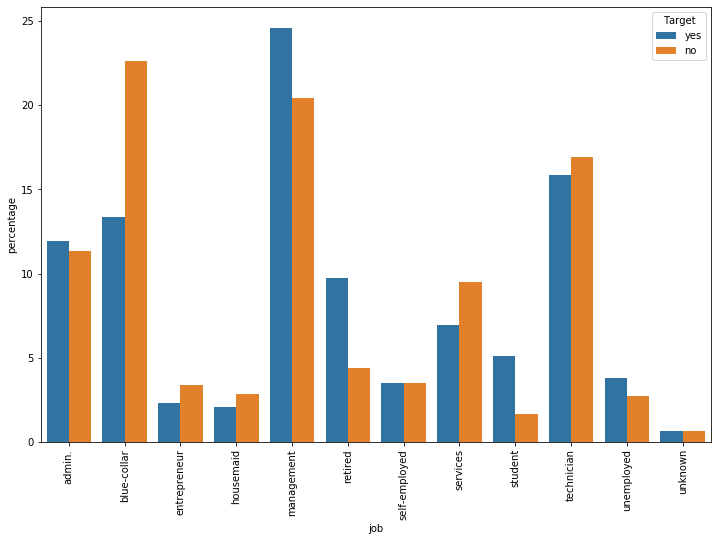

In [33]:
# Let us plot the percentage bar plot for each job category
plt.figure(figsize=(12,8))
job_counts = (df.groupby(['Target'])['job']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('job'))
p = sns.barplot(x="job", y="percentage", hue="Target", data=job_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Analysing marital attribute

In [34]:
df['marital'].value_counts(normalize=True).rename('marital %').to_frame()*100

marital %
married   60.193316
single    28.289576
divorced  11.517109

**There are 3 marital categories, "married", "single" and "divorced" of which married clients appear the most.**

In [35]:
# Let us see the term plan subscription among the marital categories
df_mar = df_cat.groupby(['marital','Target']).size()
df_mar=df_mar.unstack()
# Let's us put also the percentage
df_mar['no %'] = df_mar.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_mar['yes %'] = df_mar.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_mar = df_mar.sort_values(by='yes %',ascending=False)
df_mar

Target       no   yes       no %      yes %
marital                                    
single    10878  1912  85.050821  14.949179
divorced   4585   622  88.054542  11.945458
married   24459  2755  89.876534  10.123466

**Observations**
* Out of all the clients contacted with "single" marital status, almost 15% subscribed the term deposit plan.

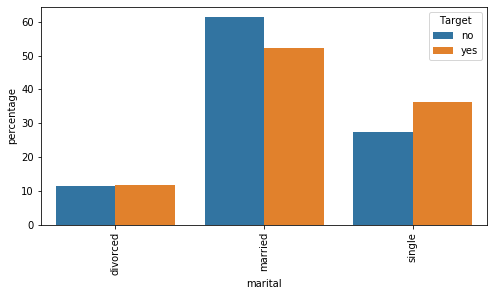

In [36]:
# Let us plot the percentage bar plot for each marital category
plt.figure(figsize=(8,4))
mar_counts = (df.groupby(['Target'])['marital']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('marital'))
p = sns.barplot(x="marital", y="percentage", hue="Target", data=mar_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Analysing education attribute

In [37]:
df['education'].value_counts(normalize=True).rename('education %').to_frame()*100

education %
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407

**There are 4 education categories, "secondary", "tertiary", "primary" and "unknown" of which clients with secnodary education appear the most.**

In [38]:
# Let us see the term plan subscription among the education categories
df_edu = df_cat.groupby(['education','Target']).size()
df_edu=df_edu.unstack()
# Let's us put also the percentage
df_edu['no %'] = df_edu.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_edu['yes %'] = df_edu.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_edu = df_edu.sort_values(by='yes %',ascending=False)
df_edu

Target        no   yes       no %      yes %
education                                   
tertiary   11305  1996  84.993610  15.006390
unknown     1605   252  86.429725  13.570275
secondary  20752  2450  89.440565  10.559435
primary     6260   591  91.373522   8.626478

**Observations:**
* Of all the clients contacted with "tertiary" education, 15% of them subscribed the term deposit plan

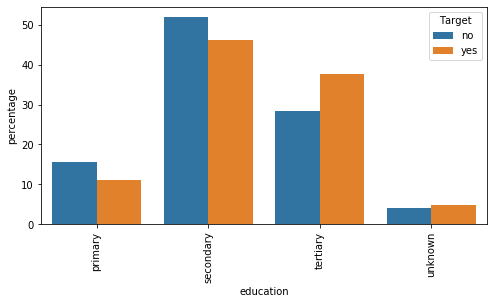

In [39]:
# Let us plot the percentage bar plot for each education category
plt.figure(figsize=(8,4))
edu_counts = (df.groupby(['Target'])['education']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('education'))
p = sns.barplot(x="education", y="percentage", hue="Target", data=edu_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

### Analyzing the job, marital and education combiningly for plan subscription

In [40]:
df_jme = df.groupby(['job','marital','education','Target']).size()
df_jme = df_jme.unstack(['marital','education'],fill_value=0)
df_jme

marital              divorced                            married            \
education             primary secondary tertiary unknown primary secondary   
job           Target                                                         
admin.        no           27       568       48      17     142      1952   
              yes           3        80        6       1       7       243   
blue-collar   no          286       366        4      36    2775      3407   
              yes          34        21        0       3     145       265   
entrepreneur  no            9        61       90       4     146       369   
              yes           0         6        7       2      10        34   
housemaid     no           79        64       17       6     465       248   
              yes          11         6        1       0      30        22   
management    no           26       122      797      24     228       629   
              yes           0        15      120       7      21        61   
retired       no          114       121       58      11     474       616   
              yes          48        44       27       2     128       158   
self-employed no            5        53       59       1     108       379   
              yes           1         4       17       0       4        29   
services      no           56       413       12      18     214      1845   
              yes           4        41        2       3      19       144   
student       no            1         1        2       1       1        15   
              yes           0         0        1       0       1         5   
technician    no           16       654      157      21     114      2608   
              yes           1        54       18       4      11       276   
unemployed    no           25        98       21       0     147       360   
              yes           2        20        4       1      17        61   
unknown       no            4         3        3       6      36        38   
              yes           0         0        0       1       3         6   

marital                                single                             
education            tertiary unknown primary secondary tertiary unknown  
job           Target                                                      
admin.        no          199      94      28      1197      226      42  
              yes          43      13       2       179       50       4  
blue-collar   no           56     293     479      1165       65      92  
              yes           4      23      39       147       20       7  
entrepreneur  no          419      55      16        60      125      10  
              yes          34       3       2        12       11       2  
housemaid     no          103      29      34        49       31       6  
              yes          11       4       8         6       10       0  
management    no         3737     125      18       273     2133      45  
              yes         563      36       1        21      451       5  
retired       no          186      73      29        40       21       5  
              yes          68      28       2         5        6       0  
self-employed no          408      19      12       102      232      14  
              yes          42       4       0        10       75       1  
services      no           84      86      46       903       81      27  
              yes           7       8       6       111       16       8  
student       no           20       8      26       341      142     111  
              yes           2       2      15       146       56      41  
technician    no          776     138      15      1449      749      60  
              yes         121       8       1       188      147      11  
unemployed    no          113      14      51       162       99      11  
              yes          17       2      15        27       35       1  
unknown       no  

**Observations:** As seen earlier in the job analysis part, student, retired clients had better percentage of buying the term deposit plan, so keeping only these two job categories, we get

In [41]:
df_jme = df_jme.loc[['student','retired']]
df_jme

marital        divorced                            married                     \
education       primary secondary tertiary unknown primary secondary tertiary   
job     Target                                                                  
retired no          114       121       58      11     474       616      186   
        yes          48        44       27       2     128       158       68   
student no            1         1        2       1       1        15       20   
        yes           0         0        1       0       1         5        2   

marital                 single                             
education      unknown primary secondary tertiary unknown  
job     Target                                             
retired no          73      29        40       21       5  
        yes         28       2         5        6       0  
student no           8      26       341      142     111  
        yes          2      15       146       56      41

* One can see that, retired clients with divorced or married status and higher education tend to subscribe more of the term deposit plan
* Student clients with single marital status & secondary and tertiary education tend to buy more of the term deposit plan

#### Analysing default attribute

In [42]:
df['default'].value_counts(normalize=True).rename('Default %').to_frame()*100

Default %
no   98.197341
yes   1.802659

**One can see that, only 1.8% of the total clients are defaulters**

In [43]:
# Let us see the term plan subscription among the default categories
df_def = df_cat.groupby(['default','Target']).size()
df_def=df_def.unstack()
# Let's us put also the percentage
df_def['no %'] = df_def.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_def['yes %'] = df_def.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_def = df_def.sort_values(by='yes %',ascending=False)
df_def

Target      no   yes       no %      yes %
default                                   
no       39159  5237  88.203892  11.796108
yes        763    52  93.619632   6.380368

**11.8% of the no defaulters tend to buy the term deposit plan where as only 6.3% of the defaulters tend to buy the term deposit.**

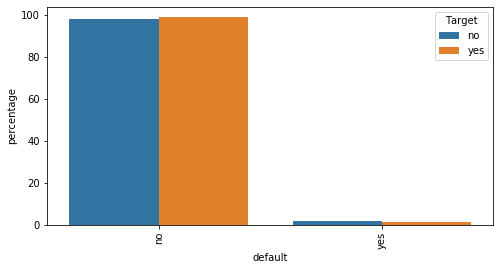

In [44]:
# Let us plot the percentage plot for each default category
plt.figure(figsize=(8,4))
def_counts = (df.groupby(['Target'])['default']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('default'))
p = sns.barplot(x="default", y="percentage", hue="Target", data=def_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Analysing housing attribute

In [45]:
df['housing'].value_counts(normalize=True).rename('housing %').to_frame()*100

housing %
yes  55.583818
no   44.416182

**One can see that, almost 55% of the total clients have purchased housing loan**

In [46]:
# Let us see the term plan subscription among the housing categories
df_hous = df_cat.groupby(['housing','Target']).size()
df_hous=df_hous.unstack()
# Let's us put also the percentage
df_hous['no %'] = df_hous.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_hous['yes %'] = df_hous.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_hous = df_hous.sort_values(by='yes %',ascending=False)
df_hous

Target      no   yes       no %      yes %
housing                                   
no       16727  3354  83.297645  16.702355
yes      23195  1935  92.300040   7.699960

**Out of the total clients those who have not purchased housing loan have more tendency to buy term deposit plan (16.7%) than those who have purchased the housing loan (7.70%)**

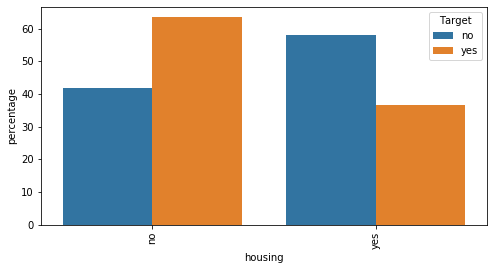

In [47]:
# Let us plot the percentage plot for each housing category
plt.figure(figsize=(8,4))
hou_counts = (df.groupby(['Target'])['housing']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('housing'))
p = sns.barplot(x="housing", y="percentage", hue="Target", data=hou_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Analysing loan attribute

In [48]:
df['loan'].value_counts(normalize=True).rename('loan %').to_frame()*100

loan %
no   83.977351
yes  16.022649

**One can see that, 16% of the total clients have purchased personal loan**

In [49]:
# Let us see the term plan subscription among the loan categories
df_loan = df_cat.groupby(['loan','Target']).size()
df_loan=df_loan.unstack()
# Let's us put also the percentage
df_loan['no %'] = df_loan.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_loan['yes %'] = df_loan.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_loan = df_loan.sort_values(by='yes %',ascending=False)
df_loan

Target     no   yes       no %      yes %
loan                                     
no      33162  4805  87.344273  12.655727
yes      6760   484  93.318609   6.681391

**Out of the total clients those who have not purchased personal loan have more tendency to buy term deposit plan (12.65%) than those who have purchased the personal loan (6.68%)**

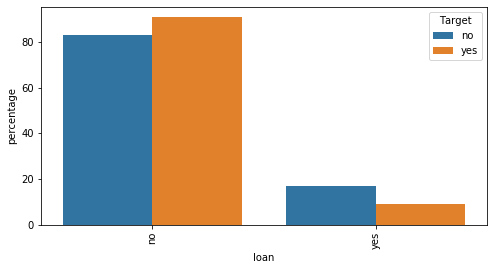

In [50]:
# Let us plot the percentage plot for each personal loan category
plt.figure(figsize=(8,4))
loan_counts = (df.groupby(['Target'])['loan']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('loan'))
p = sns.barplot(x="loan", y="percentage", hue="Target", data=loan_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Analysing contact attribute

In [51]:
df['contact'].value_counts(normalize=True).rename('contact %').to_frame()*100

contact %
cellular   64.774059
unknown    28.798301
telephone   6.427639

**Most of the clients were contacted through cellular communication**

In [52]:
# Let us see the term plan subscription among the cellular categories
df_con = df_cat.groupby(['contact','Target']).size()
df_con=df_con.unstack()
# Let's us put also the percentage
df_con['no %'] = df_con.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_con['yes %'] = df_con.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_con = df_con.sort_values(by='yes %',ascending=False)
df_con

Target        no   yes       no %      yes %
contact                                     
cellular   24916  4369  85.081100  14.918900
telephone   2516   390  86.579491  13.420509
unknown    12490   530  95.929339   4.070661

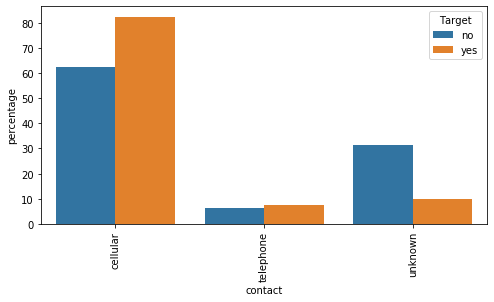

In [53]:
# Let us plot the percentage plot for each contact category
plt.figure(figsize=(8,4))
cont_counts = (df.groupby(['Target'])['contact']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('contact'))
p = sns.barplot(x="contact", y="percentage", hue="Target", data=cont_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

**one can see that contacting a client using cellular phone shows more success towards buying the term deposit. (may be there are less chances of contacting a client  successfully using other communication types such as telephones etc.)**

#### Analysing month attribute

In [54]:
df['month'].value_counts(normalize=True).rename('month %').to_frame()*100

month %
may  30.448342
jul  15.250713
aug  13.817434
jun  11.813497
nov   8.781049
apr   6.485147
feb   5.859194
jan   3.103227
oct   1.632346
sep   1.280662
mar   1.055053
dec   0.473336

**For most of the clients, last contact month of the year is 'May'.**

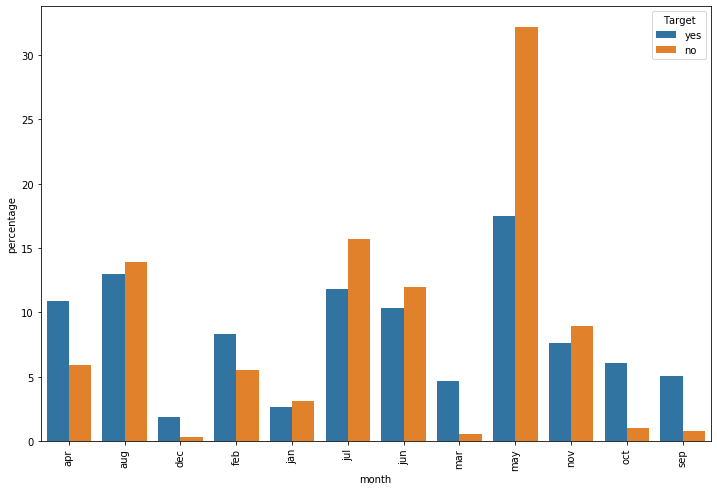

In [55]:
# Let us plot the percentage plot for each month category
plt.figure(figsize=(12,8))
mon_counts = (df.groupby(['Target'])['month']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('month'))
p = sns.barplot(x="month", y="percentage", hue="Target", data=mon_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

One can see that, comparatively there is good percentage for subscription of the term deposit plan in December, March, October and September.

#### Analysing poutcome attribute

In [56]:
df['poutcome'].value_counts(normalize=True).rename('poutcome %').to_frame()*100

poutcome %
unknown   81.747805
failure   10.840282
other      4.069806
success    3.342107

**For most of the clients the outcome of the previous marketing campaign is unknown**

In [57]:
# Let us see the term plan subscription among the poutcome categories
df_pout = df_cat.groupby(['poutcome','Target']).size()
df_pout=df_pout.unstack()
# Let's us put also the percentage
df_pout['no %'] = df_pout.apply(lambda row: row.no/(row.no+row.yes)*100, axis = 1)
df_pout['yes %'] = df_pout.apply(lambda row: row.yes/(row.yes+row.no)*100, axis = 1)
# Let's sort the dataframe with higher yes count
df_pout = df_pout.sort_values(by='yes %',ascending=False)
df_pout

Target       no   yes       no %      yes %
poutcome                                   
success     533   978  35.274653  64.725347
other      1533   307  83.315217  16.684783
failure    4283   618  87.390329  12.609671
unknown   33573  3386  90.838497   9.161503

**One can see that, probalibility of a client for buying the term deposit plan is very high provided he/she has previously subscribed the same.**

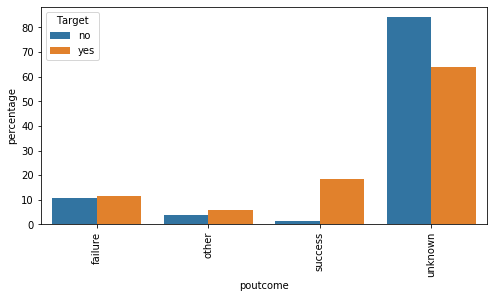

In [58]:
# Let us plot the percentage plot for each poutcome category
plt.figure(figsize=(8,4))
pout_counts = (df.groupby(['Target'])['poutcome']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('poutcome'))
p = sns.barplot(x="poutcome", y="percentage", hue="Target", data=pout_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Let's observe the correlation among the numeric attributes

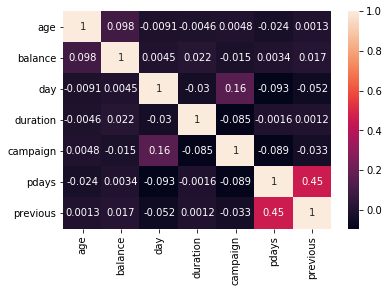

In [59]:
sns.heatmap(df.corr(),annot=True)

One can see that numeric attributes doesn't have any significant correlation among them.

#### e) Let us the check the presence of outliers

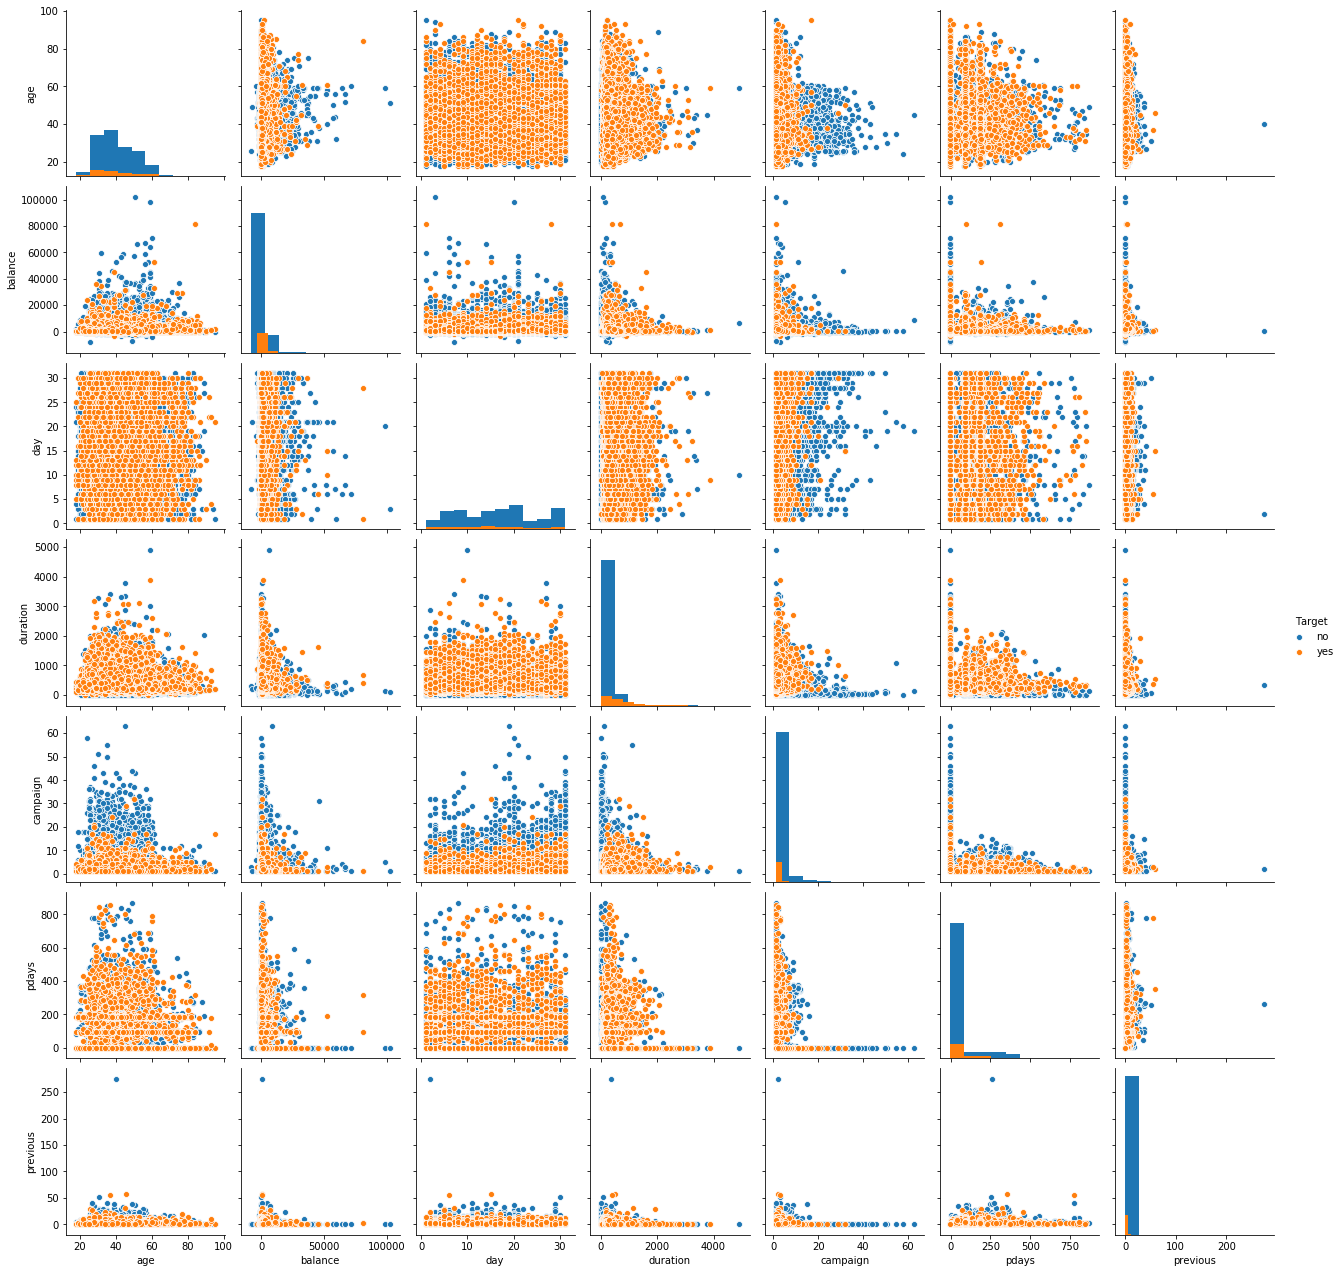

In [60]:
# We will start by analysing the numerical attribute distributions
sns.pairplot(df, hue='Target',diag_kind='hist')

**One can see that, distributions for most of the numerical attributes are highly skewed and hence contain outliers.**

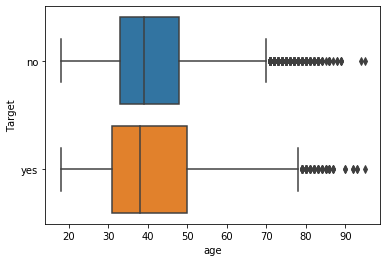

In [61]:
# Box plot for Age atribute with target along y axis
sns.boxplot(x=df['age'],y=df['Target']);

**Age attribute shows outliers**

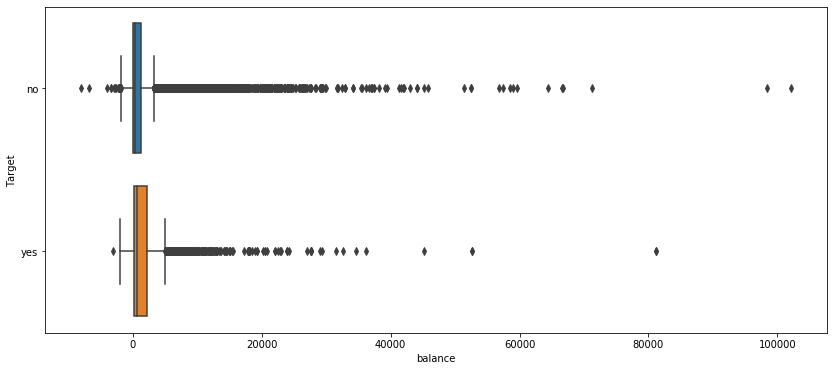

In [62]:
# Box plot for balance atribute with target along y axis
plt.figure(figsize=(14,6))
sns.boxplot(x=df['balance'],y=df['Target']);

**Balance attribute also shows presence of outliers**

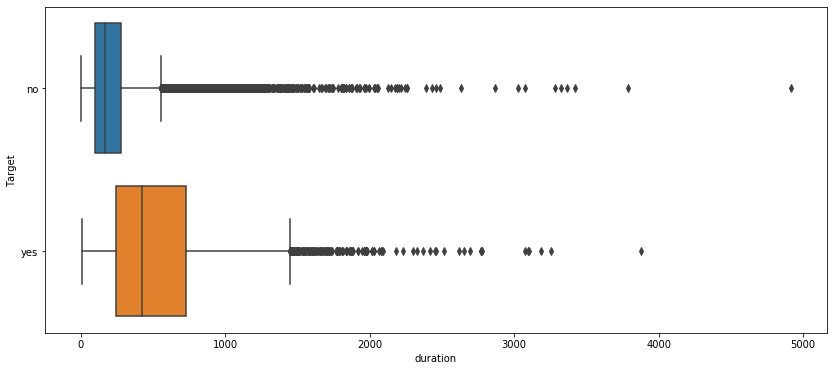

In [63]:
# Box plot for duration attribute with target along y axis
plt.figure(figsize=(14,6))
sns.boxplot(x=df['duration'],y=df['Target']);

**One can see that average value of last contact duration in case of subscriber clients is more than the non subscribers. Duration attribute also shows presence of outliers.**

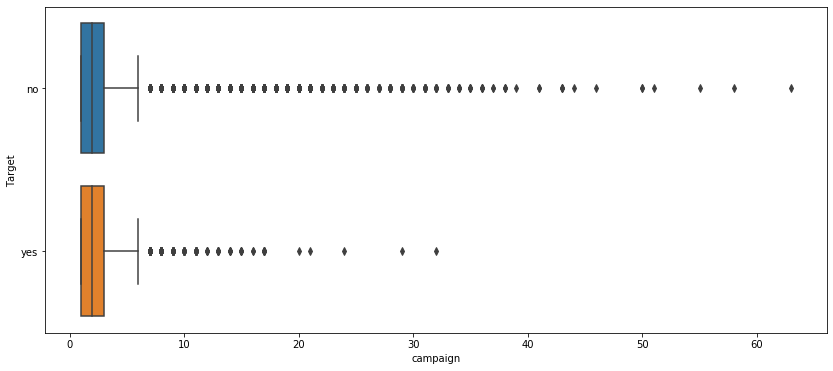

In [64]:
# Box plot for campaign attribute with target along y axis
plt.figure(figsize=(14,6))
sns.boxplot(x=df['campaign'],y=df['Target']);

**Campaign attribute shows outliers.**

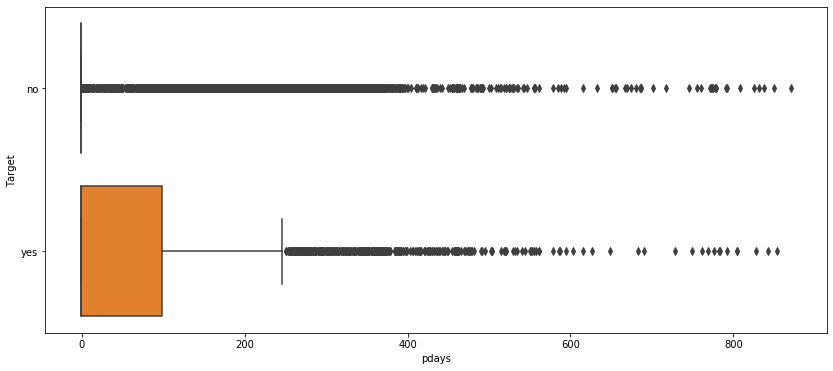

In [65]:
# Box plot for pdays attribute with target along y axis
plt.figure(figsize=(14,6))
sns.boxplot(x=df['pdays'],y=df['Target']);

**This numeric attribute also shows presence of outliers**

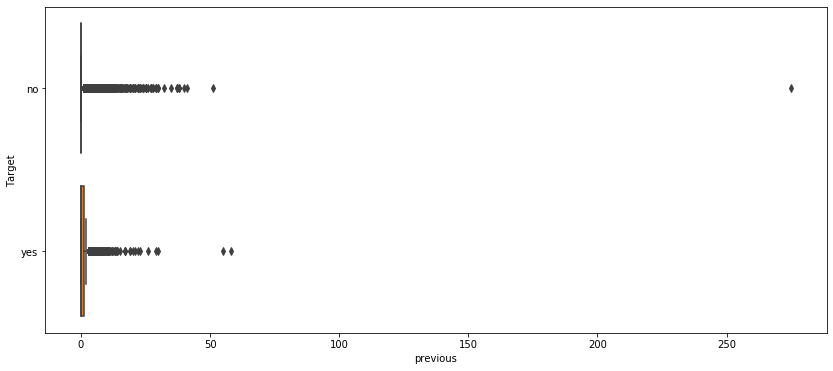

In [66]:
# Box plot for previous attribute with target along y axis
plt.figure(figsize=(14,6))
sns.boxplot(x=df['previous'],y=df['Target']);

**previous** attribute also has ouitliers

### 4) Preparing the data to train a model – checking if data types are appropriate, getting rid of the missing values etc.

Before, proceeding to the data preparation, we drop the 'duration' attribute from the data in order to build a realistic predictive model

In [67]:
df.drop('duration',axis=1,inplace=True)

#### Checking whether dataytpes are appropriate 

In [68]:
# Let us see the datatype of each attribute
df.dtypes.sort_values()

age           int64
balance       int64
day           int64
campaign      int64
pdays         int64
previous      int64
job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
Target       object
dtype: object

Integer data types for 'age', 'balance', 'campaign' (number of contacts performed during current campaign including last contact), 'pdays' (number of days that passed by after the client was last contacted from a previous campaign) and 'previous' (number of contacts performed before current campaign) make sense, also the data types for categorical variables are also correct.

#### Getting rid of the missing values

In [69]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Since no missing values are there in the dataset, we do not have to perform missing value imputation

### Data Preparation

Since many machine learning algorithms cannot operate on categorical data directly, we need to convert  all categorical attributes (input and output) to numeric. We choose one-hot enoding scheme to do the same. Before, that let us see how many unique categories are there in each of the categorical attributes?

In [70]:
df.select_dtypes(include=['object']).nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Target        2
dtype: int64

Except for 'job' and 'month', number of unique categories are less than 5, so we can use one-hot encoding which results in adding number of independent attributes.

#### One-hot encoding of the categorical columns
To do this, one can use *sklearn.preprocessing* module's *OneHotEncoder* class or pandas method *get_dummies()*

In [71]:
# Selecting the columns of interest.
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','Target']
df_cat = df[cat_cols]
df_cat.head()

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome Target  
0  unknown     no  
1  unknown     no  
2  unknown     no  
3  unknown     no  
4  unknown     no

In [72]:
# Using pandas get_dummies() method to do one-hot-encodng.
df_ohe = pd.get_dummies(data = df_cat,drop_first=True)
df_ohe.head()

job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   
1                0                 0              0               0   
2                0                 1              0               0   
3                1                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               1   
2            0                  0             0            0               0   
3            0                  0             0            0               0   
4            0                  0             0            0               0   

   job_unemployed  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0               0  ...          0          0          1          0          0   
1               0  ...          0          0          1          0          0   
2               0  ...          0          0          1          0          0   
3               0  ...          0          0          1          0          0   
4               0  ...          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  Target_yes  
0          0               0                 0                 1           0  
1          0               0                 0                 1           0  
2          0               0                 0                 1           0  
3          0               0                 0                 1           0  
4          0               0                 0                 1           0  

[5 rows x 36 columns]

In [73]:
# Separate the numeric columns
df_num = df.select_dtypes(include='number')
df_num.head()

age  balance  day  campaign  pdays  previous
0   58     2143    5         1     -1         0
1   44       29    5         1     -1         0
2   33        2    5         1     -1         0
3   47     1506    5         1     -1         0
4   33        1    5         1     -1         0

In [74]:
# Joining the numeric and one-hot encoded attribute columns
df_final = df_num.join(df_ohe)
# Renaming the target column name
df_final.rename(columns={'Target_yes':'Target'},inplace=True)
df_final.head()

age  balance  day  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5         1     -1         0                0   
1   44       29    5         1     -1         0                0   
2   33        2    5         1     -1         0                0   
3   47     1506    5         1     -1         0                1   
4   33        1    5         1     -1         0                0   

   job_entrepreneur  job_housemaid  job_management  ...  month_jun  month_mar  \
0                 0              0               1  ...          0          0   
1                 0              0               0  ...          0          0   
2                 1              0               0  ...          0          0   
3                 0              0               0  ...          0          0   
4                 0              0               0  ...          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          1          0          0          0               0   
1          1          0          0          0               0   
2          1          0          0          0               0   
3          1          0          0          0               0   
4          1          0          0          0               0   

   poutcome_success  poutcome_unknown  Target  
0                 0                 1       0  
1                 0                 1       0  
2                 0                 1       0  
3                 0                 1       0  
4                 0                 1       0  

[5 rows x 42 columns]

### 5) Split the data into training and test set in the ratio of 70:30 respectively

In [75]:
# Train test split
X = df_final.drop(['Target'],axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 7 )

#### 5.1) Scaling the data
We use StandardScaler scheme to scale the data which standardizes feature attributes by removing the mean and scaling to unit variance

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 6) Training few standard classification algorithms and commenting on their performances across different classification metrics.
In this section, we will first train and test the performance of the following classification algorithms as base models:
* Logistic Regression
* Naive Bayes Classifier
* K-NN Classifier
* SVC

**Evaluation Metrics used:** In order to evaluate the model performance, we use **accuracy score, confusion matrix, precision score, recall score and f1-score.**

**Important metrics for evaluation:** In the context of the given problem, the confusion metrics can be explained as follows:
* TP: The number of clients predicted by the model who would subscribe the term deposit plan and actually have subscribed the same.
* FP: The number of clients predicted by the model who would subscribe the term deposit plan but  actually have not subscribed the same.
* FN: The number of clients predicted by the model who would not subscribe the term deposit plan but  actually have subscribed the same.
* TN: The number of clients predicted by the model who would not subscribe the term deposit plan and   actually have not subscribed the same.

**In this case, a model minimizing the FP with good accuracy would be appropriate since:**
* Clients predicted as *false positives* may not get contacted in the next campaign even though they have not subscribed the term deposit plan which is harmful as bank may loose possible clients
* Clients predicted as *false negatives* may get contacted again in the next campaign and their previous outcome (already customer) will be updated with the bank which is not that harmful.
* Thus model minimizing the false positives i.e., with good *precision score* along with *accuracy score* are considered as the best.

#### Baseline algorithms and their performance for this dataset

In [77]:
# Creating empty dataframe to store the scores of various classification algorithms
df_comp = pd.DataFrame({'Classification Algorithm':[],'Accuracy (%)':[],'f1-score (%)':[], 'precision (%)':[], 'recall (%)':[]})

#### Logistic Regression

In [78]:
# create model using constructor
LogRegModel = LogisticRegression()
# fit the model to training set
LogRegModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = LogRegModel.predict(X_test_scaled)
# get accuracy of model
lr_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
lr_f1_score = f1_score(y_test,y_pred,pos_label='yes')
# get precision-score of model
lr_prec_score = precision_score(y_test,y_pred,pos_label='yes')
# get recall-score of model
lr_rec_score = recall_score(y_test,y_pred,pos_label='yes')
# get the confusion matrix
lr_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
lr_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(lr_acc_score*100))
print("The f1-score of the model is {} %".format(lr_f1_score*100))
print("The precision-score of the model is {} %".format(lr_prec_score*100))
print("The recall-score of the model is {} %".format(lr_rec_score*100))
print("The confusion matrix for logistic regression is: \n",lr_confmat)
print("Detailed classification report for logistic regression is: \n",lr_classrep)

The accuracy of the model is 89.30993807136538 %
The f1-score of the model is 27.427427427427432 %
The precision-score of the model is 59.05172413793104 %
The recall-score of the model is 17.861799217731424 %
The confusion matrix for logistic regression is: 
 [[11840   190]
 [ 1260   274]]
Detailed classification report for logistic regression is: 
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     12030
         yes       0.59      0.18      0.27      1534

    accuracy                           0.89     13564
   macro avg       0.75      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



**Logistic regression accuracy seems to be good (89.30%) but f1-score (27.42%) is less.**

In [79]:
# Storing logistic regression results in the dataframe
lr_data = {'Classification Algorithm':'Logistic Regression','Accuracy (%)':lr_acc_score*100,'f1-score (%)':lr_f1_score*100,'precision (%)':lr_prec_score*100,'recall (%)':lr_rec_score*100}
df_comp.loc[0] = lr_data

#### Naive Bayes Classifier

In [80]:
# create model using constructor
NBModel = GaussianNB()
# fit the model to training set
NBModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = NBModel.predict(X_test_scaled)
# get accuracy of model
nb_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
nb_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
nb_prec_score = precision_score(y_test,y_pred,pos_label='yes')
# get recall-score of model
nb_rec_score = recall_score(y_test,y_pred,pos_label='yes')
# get the confusion matrix
nb_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
nb_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(nb_acc_score*100))
print("The f1-score of the model is {} %".format(nb_f1_score*100))
print("The precision-score of the model is {} %".format(nb_prec_score*100))
print("The recall-score of the model is {} %".format(nb_rec_score*100))
print("The confusion matrix for Naive Bayes classifier is: \n",nb_confmat)
print("Detailed classification report for Naive Bayes classifier is: \n",nb_classrep)

The accuracy of the model is 85.40990858153937 %
The f1-score of the model is 38.67369073442826 %
The precision-score of the model is 36.85764914353219 %
The recall-score of the model is 40.67796610169492 %
The confusion matrix for Naive Bayes classifier is: 
 [[10961  1069]
 [  910   624]]
Detailed classification report for Naive Bayes classifier is: 
               precision    recall  f1-score   support

          no       0.92      0.91      0.92     12030
         yes       0.37      0.41      0.39      1534

    accuracy                           0.85     13564
   macro avg       0.65      0.66      0.65     13564
weighted avg       0.86      0.85      0.86     13564



**As compared to logistic regression, the accuracy is less (85.40%) in case of Naive Bayes (NB) classifier, however NB classifier has better f1-score (38.67%).**

In [81]:
# Storing the results of Naive Bayes Classifier in the dataframe
nb_data = {'Classification Algorithm':'Naive Bayes','Accuracy (%)':nb_acc_score*100,'f1-score (%)':nb_f1_score*100,'precision (%)':nb_prec_score*100,'recall (%)':nb_rec_score*100}
df_comp.loc[1] = nb_data

In [82]:
# Checking whether results are correctly added in the dataframe
df_comp

Classification Algorithm  Accuracy (%)  f1-score (%)  precision (%)  \
0      Logistic Regression     89.309938     27.427427      59.051724   
1              Naive Bayes     85.409909     38.673691      36.857649   

   recall (%)  
0   17.861799  
1   40.677966

#### K-NN Classifier

In [83]:
# create model using constructor
KNNModel = KNeighborsClassifier() # Calling default constructor
# fit the model to training set
KNNModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = KNNModel.predict(X_test_scaled)
# get accuracy of model
knn_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
knn_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
knn_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
knn_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(knn_acc_score*100))
print("The f1-score of the model is {} %".format(knn_f1_score*100))
print("The confusion matrix for K-NN classifier is: \n",knn_confmat)
print("Detailed classification report for K-NN classifier is: \n",knn_classrep)

The accuracy of the model is 88.60218224712474 %
The f1-score of the model is 31.288888888888888 %
The confusion matrix for K-NN classifier is: 
 [[11666   364]
 [ 1182   352]]
Detailed classification report for K-NN classifier is: 
               precision    recall  f1-score   support

          no       0.91      0.97      0.94     12030
         yes       0.49      0.23      0.31      1534

    accuracy                           0.89     13564
   macro avg       0.70      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



**With default parameters, K-NN classifier accuracy is slightly less than logistic regression however better than Naive Bayes classifier. f1-score is comparable with Naive bayes while better than logistic regression case.**

#### Finding best value of k

In [84]:
# KNN Accuracy for neighbors = 1,3,...29
knn_acc=[]
knn_f1 = []
for i in range(1,30,2):
    print("Calculating the K-NN classifier accuracy for {} neighbors.".format(i))
    # create model using constructor
    KNNModel = KNeighborsClassifier(n_neighbors=i) # Calling default constructor
    # fit the model to training set
    KNNModel.fit(X_train_scaled,y_train)
    # Predict the test data to get y_pred
    y_pred = KNNModel.predict(X_test_scaled)
    # get accuracy of model
    knn_acc_score = accuracy_score(y_test,y_pred)
    knn_acc.append(knn_acc_score*100)
    # get F1-score of model
    knn_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
    knn_f1.append(knn_f1_score*100)
df_knn = pd.DataFrame({'n_neighbors':list(range(1,30,2)), 'Accuracy':knn_acc,'f1-score':knn_f1})

Calculating the K-NN classifier accuracy for 1 neighbors.
Calculating the K-NN classifier accuracy for 3 neighbors.
Calculating the K-NN classifier accuracy for 5 neighbors.
Calculating the K-NN classifier accuracy for 7 neighbors.
Calculating the K-NN classifier accuracy for 9 neighbors.
Calculating the K-NN classifier accuracy for 11 neighbors.
Calculating the K-NN classifier accuracy for 13 neighbors.
Calculating the K-NN classifier accuracy for 15 neighbors.
Calculating the K-NN classifier accuracy for 17 neighbors.
Calculating the K-NN classifier accuracy for 19 neighbors.
Calculating the K-NN classifier accuracy for 21 neighbors.
Calculating the K-NN classifier accuracy for 23 neighbors.
Calculating the K-NN classifier accuracy for 25 neighbors.
Calculating the K-NN classifier accuracy for 27 neighbors.
Calculating the K-NN classifier accuracy for 29 neighbors.


In [85]:
df_knn

n_neighbors   Accuracy   f1-score
0             1  83.920672  28.795299
1             3  87.665880  31.630568
2             5  88.602182  31.288889
3             7  88.919198  31.212815
4             9  89.029785  31.428571
5            11  89.199351  32.018561
6            13  89.214096  31.603553
7            15  89.169861  31.515152
8            17  89.265703  31.835206
9            19  89.287821  31.879981
10           21  89.332055  31.324158
11           23  89.302566  30.937649
12           25  89.265703  30.334928
13           27  89.214096  30.033477
14           29  89.206724  29.750480

**K-NN with 11 nearest neighbors seems to be the best choice in terms of both accuracy as well as f1-score.**

In [86]:
# create model using constructor
SVMModel = SVC() # Calling default constructor
# fit the model to training set
SVMModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = SVMModel.predict(X_test_scaled)
# get accuracy of model
svm_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
svm_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
svm_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
svm_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(svm_acc_score*100))
print("The f1-score of the model is {} %".format(svm_f1_score*100))
print("The confusion matrix for SVM classifier is: \n",svm_confmat)
print("Detailed classification report for SVM classifier is: \n",svm_classrep)

The accuracy of the model is 89.46475965791801 %
The f1-score of the model is 28.728179551122196 %
The confusion matrix for SVM classifier is: 
 [[11847   183]
 [ 1246   288]]
Detailed classification report for SVM classifier is: 
               precision    recall  f1-score   support

          no       0.90      0.98      0.94     12030
         yes       0.61      0.19      0.29      1534

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



**Support vector classifier with default parameters has better accuracy however f1-sore is less than Naive Bayes and K-NN classifier (n_neighbors=11).**

In [87]:
# Tuning support vector classifier
svm_acc=[]
svm_f1 = []
for i in range(1,300,50):
    print("Calculating the SVM classifier accuracy for C = {}.".format(i))
    # create model using constructor
    SVMModel = SVC(C=i) # Calling default constructor
    # fit the model to training set
    SVMModel.fit(X_train_scaled,y_train)
    # Predict the test data to get y_pred
    y_pred = SVMModel.predict(X_test_scaled)
    # get accuracy of model
    svm_acc_score = accuracy_score(y_test,y_pred)
    svm_acc.append(svm_acc_score*100)
    # get F1-score of model
    svm_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
    svm_f1.append(svm_f1_score*100)
df_svm = pd.DataFrame({'C':list(range(1,300,50)), 'Accuracy':svm_acc,'f1-score':svm_f1})

Calculating the SVM classifier accuracy for C = 1.
Calculating the SVM classifier accuracy for C = 51.
Calculating the SVM classifier accuracy for C = 101.
Calculating the SVM classifier accuracy for C = 151.
Calculating the SVM classifier accuracy for C = 201.
Calculating the SVM classifier accuracy for C = 251.


In [88]:
df_svm

C   Accuracy   f1-score
0    1  89.464760  28.728180
1   51  88.292539  33.667502
2  101  88.027131  34.251012
3  151  87.724860  33.532934
4  201  87.599528  33.779528
5  251  87.437334  33.385457

**Support vector classifier with C=101 gives better f1-score as well as accuracy score (slightly less than best accuracy score)**

**For the given dataset,**
* In case of k-NN classifier, k=11 gives best result both in terms of accuracy as well as f1-score.
* In case of SVC, C=101 gives best result both in terms of accuracy as well as f1-score.

We will use above parameters for these algorithms in our comparison.

In [89]:
# create model using constructor
KNNModel = KNeighborsClassifier(n_neighbors=11) 
# fit the model to training set
KNNModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = KNNModel.predict(X_test_scaled)
# get accuracy of model
knn_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
knn_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
knn_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
knn_rec_score = recall_score(y_test,y_pred,pos_label='yes') 

# get the confusion matrix
knn_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
knn_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(knn_acc_score*100))
print("The f1-score of the model is {} %".format(knn_f1_score*100))
print("The precision-score of the model is {} %".format(knn_prec_score*100))
print("The recall-score of the model is {} %".format(knn_rec_score*100))
print("The confusion matrix for K-NN classifier is: \n",knn_confmat)
print("Detailed classification report for K-NN classifier is: \n",knn_classrep)

The accuracy of the model is 89.19935122382779 %
The f1-score of the model is 32.01856148491879 %
The precision-score of the model is 55.55555555555556 %
The recall-score of the model is 22.490221642764016 %
The confusion matrix for K-NN classifier is: 
 [[11754   276]
 [ 1189   345]]
Detailed classification report for K-NN classifier is: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94     12030
         yes       0.56      0.22      0.32      1534

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [90]:
# Storing results of K-NN classifier in the dataset.
knn_data = {'Classification Algorithm':'K-NN Classifier','Accuracy (%)':knn_acc_score*100,'f1-score (%)':knn_f1_score*100,'precision (%)':knn_prec_score*100,'recall (%)':knn_rec_score*100}
df_comp.loc[2] = knn_data

In [91]:
# create model using constructor
SVMModel = SVC(C=101) # Calling constructor with best C
# fit the model to training set
SVMModel.fit(X_train_scaled,y_train)
# Predict the test data to get y_pred
y_pred = SVMModel.predict(X_test_scaled)
# get accuracy of model
svm_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
svm_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
svm_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
svm_rec_score = recall_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
svm_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
svm_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(svm_acc_score*100))
print("The f1-score of the model is {} %".format(svm_f1_score*100))
print("The precision-score of the model is {} %".format(svm_prec_score*100))
print("The recall-score of the model is {} %".format(svm_rec_score*100))
print("The confusion matrix for SVM classifier is: \n",svm_confmat)
print("Detailed classification report for SVM classifier is: \n",svm_classrep)

The accuracy of the model is 88.02713063992923 %
The f1-score of the model is 34.25101214574898 %
The precision-score of the model is 45.19230769230769 %
The recall-score of the model is 27.57496740547588 %
The confusion matrix for SVM classifier is: 
 [[11517   513]
 [ 1111   423]]
Detailed classification report for SVM classifier is: 
               precision    recall  f1-score   support

          no       0.91      0.96      0.93     12030
         yes       0.45      0.28      0.34      1534

    accuracy                           0.88     13564
   macro avg       0.68      0.62      0.64     13564
weighted avg       0.86      0.88      0.87     13564



In [92]:
# Storing results of the support vector classifier in the dataframe
svm_data = {'Classification Algorithm':'SVM Classifier','Accuracy (%)':svm_acc_score*100,'f1-score (%)':svm_f1_score*100,'precision (%)':svm_prec_score*100,'recall (%)':svm_rec_score*100}
df_comp.loc[3] = svm_data

In [93]:
df_comp

Classification Algorithm  Accuracy (%)  f1-score (%)  precision (%)  \
0      Logistic Regression     89.309938     27.427427      59.051724   
1              Naive Bayes     85.409909     38.673691      36.857649   
2          K-NN Classifier     89.199351     32.018561      55.555556   
3           SVM Classifier     88.027131     34.251012      45.192308   

   recall (%)  
0   17.861799  
1   40.677966  
2   22.490222  
3   27.574967

#### Comparison among the baseline algorithms:
One can see that, in terms accuracy as well as f1-score, K-NN and SVM classifier work best for the given problem. In terms of precision, Logistic regression is best followed by K-NN classifier.
Overall, K-NN with 11 neighbors is better model in terms accuracy, f1-score and precision score.

### 6) Build the ensemble models and compare the results with the base models. 

In this section, we build the following ensemble models and compare their results with the base models.
* Decision Tree Classifier
* Bagging Classifier
* Adaboost Classifier
* Gradient Boost Classifier 
* XGBoost
* Random Forest Classifier

#### Decision Tree Classifier

In [94]:
# Building the decision Tree classifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=7)
dTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [95]:
# Checking whether model is overfitting?
print(dTree.score(X_train_scaled, y_train))
print(dTree.score(X_test_scaled, y_test))

1.0
0.8293276319669713


**Model shows overfitting**

In [96]:
# Let's display the model
retCode = system("dot -Tpng bank_tree.dot -o bank_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("bank_tree.png"))

From figure, one can see that the model built is highly overfitting the training dataset.

In [97]:
# Reducing the overfitting
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=7)
dTreeR.fit(X_train_scaled, y_train)
print(dTreeR.score(X_train_scaled, y_train))
print(dTreeR.score(X_test_scaled, y_test))

0.8932916232186305
0.8942052491890298


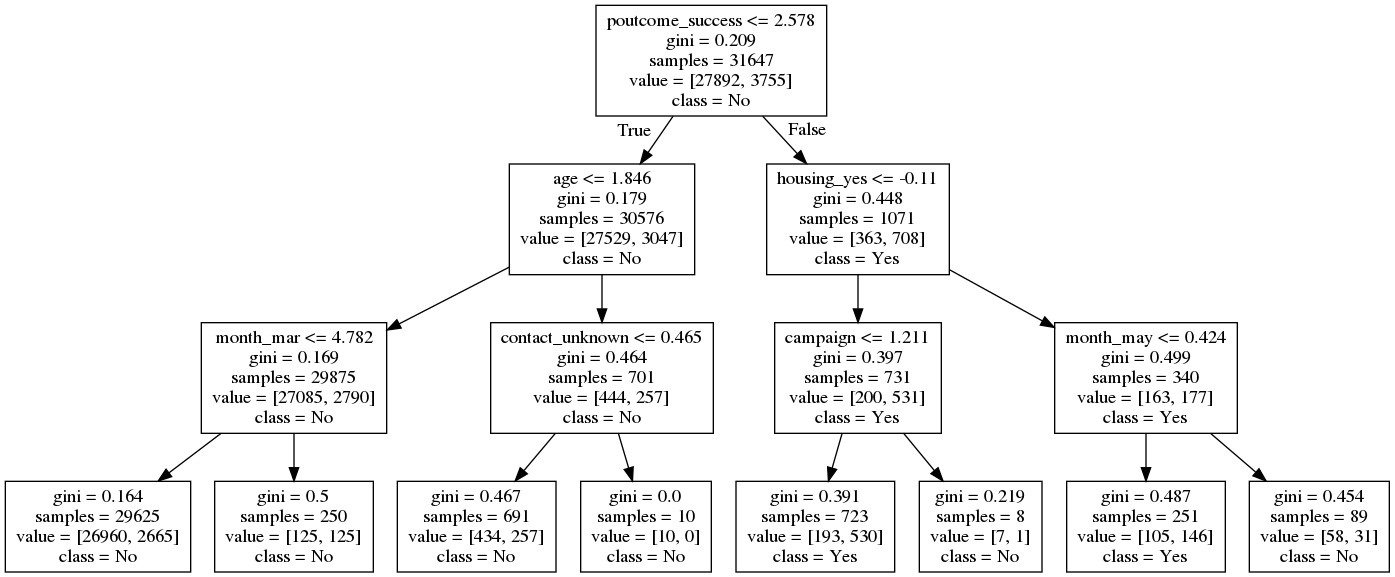

In [98]:
# Displaying the regulairized Decision Tree Model.
train_char_label = ['No', 'Yes']
Bank_Tree_FileR = open('bank_treeR.dot','w')
dot_data = export_graphviz(dTreeR, out_file=Bank_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng bank_treeR.dot -o bank_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("bank_treeR.png"))

In [99]:
# Predict the test data to get y_pred
y_pred = dTreeR.predict(X_test_scaled)
# get accuracy of model
dTreeR_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
dTreeR_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
dTreeR_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
dTreeR_rec_score = recall_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
dTreeR_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
dTreeR_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(dTreeR_acc_score*100))
print("The f1-score of the model is {} %".format(dTreeR_f1_score*100))
print("The precision-score of the model is {} %".format(dTreeR_prec_score*100))
print("The recall-score of the model is {} %".format(dTreeR_rec_score*100))
print("The confusion matrix for Decision Tree classifier is: \n",dTreeR_confmat)
print("Detailed classification report for Decision Tree classifier is: \n",dTreeR_classrep)

The accuracy of the model is 89.42052491890297 %
The f1-score of the model is 25.763062596999486 %
The precision-score of the model is 62.40601503759399 %
The recall-score of the model is 16.23207301173403 %
The confusion matrix for Decision Tree classifier is: 
 [[11880   150]
 [ 1285   249]]
Detailed classification report for Decision Tree classifier is: 
               precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.62      0.16      0.26      1534

    accuracy                           0.89     13564
   macro avg       0.76      0.57      0.60     13564
weighted avg       0.87      0.89      0.87     13564



**Precision score and accuracy is good in case of decision tree classifier.**

In [100]:
# Feature Importance according to Decision Classifier
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                          Imp
age                  0.117103
balance              0.000000
day                  0.000000
campaign             0.006700
pdays                0.000000
previous             0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_married      0.000000
marital_single       0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
default_yes          0.000000
housing_yes          0.022513
loan_yes             0.000000
contact_telephone    0.000000
contact_unknown      0.003123
month_aug            0.000000
month_dec            0.000000
month_feb            0.000000
month_jan            0.000000
month_jul            0.000000
month_jun 

The regularized decision tree classifier model shows that poutcome, months (mar, may), contact, housing, campaign and age as important features for classifiation.

In [101]:
# Storing the decision tree classifier results in the dataframe.
dt_data = {'Classification Algorithm':'Decision Tree Classifier','Accuracy (%)':dTreeR_acc_score*100,'f1-score (%)':dTreeR_f1_score*100,'precision (%)':dTreeR_prec_score*100,'recall (%)':dTreeR_rec_score*100}
df_comp.loc[4] = dt_data

#### Bagging Classifier

In [102]:
bgcl = BaggingClassifier(n_estimators=50,random_state=7)
bgcl = bgcl.fit(X_train_scaled, y_train)
# Predict the test data to get y_pred
y_pred = bgcl.predict(X_test_scaled)
# get accuracy of model
bgcl_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
bgcl_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
bgcl_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
bgcl_rec_score = recall_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
bgcl_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
bgcl_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(bgcl_acc_score*100))
print("The f1-score of the model is {} %".format(bgcl_f1_score*100))
print("The precision-score of the model is {} %".format(bgcl_prec_score*100))
print("The recall-score of the model is {} %".format(bgcl_rec_score*100))
print("The confusion matrix for Bagging classifier is: \n",bgcl_confmat)
print("Detailed classification report for Bagging classifier is: \n",bgcl_classrep)

The accuracy of the model is 89.35417281038042 %
The f1-score of the model is 34.71971066907776 %
The precision-score of the model is 56.63716814159292 %
The recall-score of the model is 25.03259452411995 %
The confusion matrix for Bagging classifier is: 
 [[11736   294]
 [ 1150   384]]
Detailed classification report for Bagging classifier is: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94     12030
         yes       0.57      0.25      0.35      1534

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



**Bagging classifier model shows better accuracy as well as better f1-score for the given problem.**

In [103]:
# Storing the results of Bagging classifier model in the dataframe.
bg_data = {'Classification Algorithm':'Bagging Classifier','Accuracy (%)':bgcl_acc_score*100,'f1-score (%)':bgcl_f1_score*100,'precision (%)':bgcl_prec_score*100,'recall (%)':bgcl_rec_score*100}
df_comp.loc[5] = bg_data

#### Adaboost

In [104]:
abcl = AdaBoostClassifier( n_estimators=50,random_state=7)
abcl = abcl.fit(X_train_scaled, y_train)
# Predict the test data to get y_pred
y_pred = abcl.predict(X_test_scaled)
# get accuracy of model
abcl_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
abcl_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
abcl_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
abcl_rec_score = recall_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
abcl_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
abcl_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(abcl_acc_score*100))
print("The f1-score of the model is {} %".format(abcl_f1_score*100))
print("The precision-score of the model is {} %".format(abcl_prec_score*100))
print("The recall-score of the model is {} %".format(abcl_rec_score*100))
print("The confusion matrix for Adaboost classifier is: \n",abcl_confmat)
print("Detailed classification report for Adaboost classifier is: \n",abcl_classrep)

The accuracy of the model is 89.28044824535534 %
The f1-score of the model is 29.96146435452794 %
The precision-score of the model is 57.38007380073801 %
The recall-score of the model is 20.273794002607563 %
The confusion matrix for Adaboost classifier is: 
 [[11799   231]
 [ 1223   311]]
Detailed classification report for Adaboost classifier is: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94     12030
         yes       0.57      0.20      0.30      1534

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



**Adaboost classifier accuracy is comparable to Decision tree as well as Bagging classifiers, however the f1-score is less than that of Bagging but better than Decision tree classifier.**

In [105]:
# Storing adaboost classifier results to the dataframe.
adb_data = {'Classification Algorithm':'Adaboost Classifier','Accuracy (%)':abcl_acc_score*100,'f1-score (%)':abcl_f1_score*100,'precision (%)':abcl_prec_score*100,'recall (%)':abcl_rec_score*100}
df_comp.loc[6] = adb_data

#### Gradient Boost Classifier

In [106]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=7)
gbcl = gbcl.fit(X_train_scaled, y_train)
# Predict the test data to get y_pred
y_pred = gbcl.predict(X_test_scaled)
# get accuracy of model
gbcl_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
gbcl_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
gbcl_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
gbcl_rec_score = recall_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
gbcl_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
gbcl_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(gbcl_acc_score*100))
print("The f1-score of the model is {} %".format(gbcl_f1_score*100))
print("The precision-score of the model is {} %".format(gbcl_prec_score*100))
print("The recall-score of the model is {} %".format(gbcl_rec_score*100))
print("The confusion matrix for Gradient Boost classifier is: \n",gbcl_confmat)
print("Detailed classification report for Gradient Boost classifier is: \n",gbcl_classrep)

The accuracy of the model is 89.41315246240048 %
The f1-score of the model is 26.358974358974365 %
The precision-score of the model is 61.77884615384615 %
The recall-score of the model is 16.753585397653197 %
The confusion matrix for Gradient Boost classifier is: 
 [[11871   159]
 [ 1277   257]]
Detailed classification report for Gradient Boost classifier is: 
               precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.62      0.17      0.26      1534

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.60     13564
weighted avg       0.87      0.89      0.87     13564



**Gradient boost classifier of sklearn module gives better precision score and accuracy.**

In [107]:
# Storing the gradient boost classifier results in the dataframe.
gb_data = {'Classification Algorithm':'Gardient Boost Classifier','Accuracy (%)':gbcl_acc_score*100,'f1-score (%)':gbcl_f1_score*100,'precision (%)':gbcl_prec_score*100,'recall (%)':gbcl_rec_score*100}
df_comp.loc[7] = gb_data

#### XGBoost (Popular implementation of Gradient Boost algorithm)

In [108]:
xgbcl = xgboost.XGBClassifier()
xgbcl = xgbcl.fit(X_train_scaled, y_train)
# Predict the test data to get y_pred
y_pred = xgbcl.predict(X_test_scaled)
# get accuracy of model
xgbcl_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
xgbcl_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
xgbcl_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
xgbcl_rec_score = recall_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
xgbcl_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
xgbcl_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(xgbcl_acc_score*100))
print("The f1-score of the model is {} %".format(xgbcl_f1_score*100))
print("The precision-score of the model is {} %".format(xgbcl_prec_score*100))
print("The recall-score of the model is {} %".format(xgbcl_rec_score*100))
print("The confusion matrix for XGBoost classifier is: \n",xgbcl_confmat)
print("Detailed classification report for XGBoost classifier is: \n",xgbcl_classrep)

The accuracy of the model is 89.49424948392804 %
The f1-score of the model is 27.7749619868221 %
The precision-score of the model is 62.414578587699324 %
The recall-score of the model is 17.861799217731424 %
The confusion matrix for XGBoost classifier is: 
 [[11865   165]
 [ 1260   274]]
Detailed classification report for XGBoost classifier is: 
               precision    recall  f1-score   support

          no       0.90      0.99      0.94     12030
         yes       0.62      0.18      0.28      1534

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



**Results of XGBoost are similar to that of sklearn's gradient boost classifier.**

In [109]:
# Storing XGBoost classifier results in the dataframe
xgb_data = {'Classification Algorithm':'XGBoost Classifier','Accuracy (%)':xgbcl_acc_score*100,'f1-score (%)':xgbcl_f1_score*100,'precision (%)':xgbcl_prec_score*100,'recall (%)':xgbcl_rec_score*100}
df_comp.loc[8] = xgb_data

#### Random Forest Classifier

In [110]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=7,max_features=12)
rfcl = rfcl.fit(X_train_scaled, y_train)
# Predict the test data to get y_pred
y_pred = rfcl.predict(X_test_scaled)
# get accuracy of model
rfcl_acc_score = accuracy_score(y_test,y_pred)
# get F1-score of model
rfcl_f1_score = f1_score(y_test,y_pred,pos_label='yes') 
# get precision-score of model
rfcl_prec_score = precision_score(y_test,y_pred,pos_label='yes') 
# get recall-score of model
rfcl_rec_score = recall_score(y_test,y_pred,pos_label='yes') 
# get the confusion matrix
rfcl_confmat = confusion_matrix(y_test,y_pred)
# get the classification report
rfcl_classrep = classification_report(y_test,y_pred)

print("The accuracy of the model is {} %".format(rfcl_acc_score*100))
print("The f1-score of the model is {} %".format(rfcl_f1_score*100))
print("The precision-score of the model is {} %".format(rfcl_prec_score*100))
print("The recall-score of the model is {} %".format(rfcl_rec_score*100))
print("The confusion matrix for Random Forest classifier is: \n",rfcl_confmat)
print("Detailed classification report for Random Forest classifier is: \n",rfcl_classrep)

The accuracy of the model is 89.2214685933353 %
The f1-score of the model is 31.296992481203013 %
The precision-score of the model is 56.060606060606055 %
The recall-score of the model is 21.70795306388527 %
The confusion matrix for Random Forest classifier is: 
 [[11769   261]
 [ 1201   333]]
Detailed classification report for Random Forest classifier is: 
               precision    recall  f1-score   support

          no       0.91      0.98      0.94     12030
         yes       0.56      0.22      0.31      1534

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



**Random forest classifier shows similar accuracy as that of Adaboost, gradient boost and XGBoost classifiers however f1-score is slightly better.** 

In [111]:
# Storing the results of Random Forest Classifier
rf_data = {'Classification Algorithm':'Random Forest Classifier','Accuracy (%)':rfcl_acc_score*100,'f1-score (%)':rfcl_f1_score*100,'precision (%)':rfcl_prec_score*100,'recall (%)':rfcl_rec_score*100}
df_comp.loc[9] = rf_data

### 7) Compare performances of all the models

In [112]:
# Results of all the models are stored in the dataframe df_comp.
df_comp

Classification Algorithm  Accuracy (%)  f1-score (%)  precision (%)  \
0        Logistic Regression     89.309938     27.427427      59.051724   
1                Naive Bayes     85.409909     38.673691      36.857649   
2            K-NN Classifier     89.199351     32.018561      55.555556   
3             SVM Classifier     88.027131     34.251012      45.192308   
4   Decision Tree Classifier     89.420525     25.763063      62.406015   
5         Bagging Classifier     89.354173     34.719711      56.637168   
6        Adaboost Classifier     89.280448     29.961464      57.380074   
7  Gardient Boost Classifier     89.413152     26.358974      61.778846   
8         XGBoost Classifier     89.494249     27.774962      62.414579   
9   Random Forest Classifier     89.221469     31.296992      56.060606   

   recall (%)  
0   17.861799  
1   40.677966  
2   22.490222  
3   27.574967  
4   16.232073  
5   25.032595  
6   20.273794  
7   16.753585  
8   17.861799  
9   21.707953

**Final Comparison:** 
* **Accuracy**: Except Naive Nayes and SVM classifiers, the accuracy of remaining models is around 89%
* **F1-score**: The best f1-score is obtained in case of Naive Bayes followed by Bagging, SVM, K-NN and Random Forest Classifiers.
* **Precision score**: the best precision score is obtained in case of Gradient Boosting-based classifiers (XGBoost and sklearn's Gradient Boost) and Decision Tree classifier.

## Overall (considering the accuracy, f1-score and precision score), *Bagging, XGBoost and Random Forest* classifiers perform better for the given problem.